# Using UMAP to visualize the cell-cell communication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns      

## Load predicted cell-cell communication data and spatial transcriptome data  

In [2]:
CellPair = pd.read_pickle('CellPair.pkl')#The predicted cell-cell communication at single-cell resolution
st_data = pd.read_pickle('st_data.pkl')#The processed spatial transcriptome data
st_data = pd.DataFrame(st_data).set_index('Unnamed: 0').rename_axis(None, axis=1)

## Filter for cell types of interest  

In [3]:
CellPairnew = CellPair[(CellPair['celltype_sender'].isin(['L2.3.IT', 'L4', 'L5.IT','L5.PT', 'L6.PT'])) 
    & (CellPair['celltype_receiver'].isin(['L2.3.IT', 'L4', 'L5.IT','L5.PT', 'L6.PT']))] # Select the cell type of interest for both sender and receiver  


In [4]:
CellPairnew

,cell_sender,cell_receiver,celltype_sender,celltype_receiver,ligand,receptor
2169764,C18,C25,L5.IT,L5.PT,Nrg1,Erbb4
2169765,C18,C24,L5.IT,L5.PT,Nrg1,Erbb4
2169766,C18,C28,L5.IT,L5.PT,Nrg1,Erbb4
2169767,C18,C29,L5.IT,L5.PT,Nrg1,Erbb4
2169768,C18,C34,L5.IT,L5.PT,Nrg1,Erbb4
...,...,...,...,...,...,...
5127835,C2369,C2310,L4,L2.3.IT,Vegfa,Itgb1
5127836,C2369,C2303,L4,L2.3.IT,Vegfa,Itgb1
5127837,C2369,C2190,L4,L2.3.IT,Vegfa,Itgb1
5127838,C2369,C2334,L4,L2.3.IT,Vegfa,Itgb1


## Extract relevant columns  

In [5]:
cell_sender = list(CellPairnew['cell_sender'].values)
cell_receiver = list(CellPairnew['cell_receiver'].values)
ligand = list(CellPairnew['ligand'].values)
receptor = list(CellPairnew['receptor'].values)

## Calculate communication score between each pair of cells  

In [6]:
score = []
for i in range(len(cell_sender)):
    sco = np.sqrt(float(st_data[cell_sender[i]][ligand[i]]) * float(st_data[cell_receiver[i]][receptor[i]]))
    score.append(sco)
CellPairnew['score'] = score


/tmp/ipykernel_4490/493919099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CellPairnew['score'] = score


## Reshape the DataFrame for easier visualization and analysis  

In [7]:
df = CellPairnew
df['row_index'] = df['cell_sender'].astype(str) + '-' + df['cell_receiver'].astype(str)  
df['col_index'] = df['ligand'].astype(str) + '-' + df['receptor'].astype(str)  
result_df = df.pivot(index='row_index', columns='col_index', values='score')  
result_df = result_df.fillna(0)  
pivot_df = result_df.rename_axis(index=None, columns=None)
pivot_df.T.to_csv('./output.csv', index=True) 

/tmp/ipykernel_4490/206652704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_index'] = df['cell_sender'].astype(str) + '-' + df['cell_receiver'].astype(str)
/tmp/ipykernel_4490/206652704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['col_index'] = df['ligand'].astype(str) + '-' + df['receptor'].astype(str)


In [8]:
pivot_df

,Adam10-Itgb1,Adam15-Erbb4,App-Itgb1,Bdnf-Itgb1,Bsg-Itgb1,C1qa-Itgb1,C1qb-Kit,Calm1-Itgb1,Calm2-Itgb1,Calm3-Itgb1,...,Nrg1-Erbb4,Nrg1-Itgb1,Nrxn3-Ptprm,Penk-Sdc2,Ptn-Sdc2,Rims1-Slc17a7,Shank1-Sstr2,Sst-Sstr2,Timp2-Itgb1,Vegfa-Itgb1
C1007-C649,0.048990,0.084853,0.182209,0.072111,0.269072,0.044721,0.045826,0.378946,0.604318,0.150997,...,0.103923,0.060000,0.176068,0.353977,0.239583,0.438178,0.070000,0.321870,0.084853,0.048990
C1007-C676,0.060000,0.094868,0.223159,0.088318,0.329545,0.054772,0.052915,0.464112,0.740135,0.184932,...,0.116190,0.073485,0.248998,0.423084,0.286356,0.536656,0.098995,0.455192,0.103923,0.060000
C1007-C699,0.054772,0.148997,0.203715,0.080623,0.300832,0.050000,0.091652,0.423674,0.675648,0.168819,...,0.182483,0.067082,0.248998,0.401373,0.271662,0.542218,0.105830,0.486621,0.094868,0.054772
C1007-C700,0.054772,0.073485,0.203715,0.080623,0.300832,0.050000,0.070000,0.423674,0.675648,0.168819,...,0.090000,0.067082,0.192873,0.500600,0.338821,0.609918,0.095394,0.438634,0.094868,0.054772
C1007-C768,0.048990,0.091652,0.182209,0.072111,0.269072,0.044721,0.074833,0.378946,0.604318,0.150997,...,0.112250,0.060000,0.294618,0.401373,0.271662,0.438178,0.064807,0.297993,0.084853,0.048990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C998-C883,0.063246,0.091652,0.213542,0.048990,0.333467,0.069282,0.109545,0.486621,0.746190,0.187617,...,0.118322,0.063246,0.000000,0.263818,0.289828,0.000000,0.084853,0.264953,0.116619,0.080000
C998-C894,0.054772,0.000000,0.000000,0.042426,0.000000,0.060000,0.074833,0.000000,0.000000,0.000000,...,0.000000,0.054772,0.000000,0.000000,0.000000,0.000000,0.084853,0.000000,0.000000,0.069282
C998-C947,0.054772,0.099499,0.184932,0.042426,0.288791,0.060000,0.120000,0.421426,0.646220,0.162481,...,0.128452,0.054772,0.000000,0.240832,0.264575,0.000000,0.066332,0.207123,0.100995,0.069282
C998-C982,0.059161,0.117473,0.199750,0.045826,0.311929,0.064807,0.126491,0.455192,0.697997,0.175499,...,0.151658,0.059161,0.000000,0.240832,0.264575,0.000000,0.066332,0.207123,0.109087,0.074833


## Prepare metadata for visualization  

In [9]:
meta_df = pivot_df
row_tuples = meta_df.index.tolist()
sender = [s.split('-')[0] for s in row_tuples]  
receiver = [s.split('-')[1] for s in row_tuples]
sender_type_dict = CellPairnew.set_index('cell_sender')['celltype_sender'].to_dict()  
receiver_type_dict = CellPairnew.set_index('cell_receiver')['celltype_receiver'].to_dict()  
sender_type = [sender_type_dict[s] for s in sender]  
receiver_type = [receiver_type_dict[r] for r in receiver]
meta_df['SendingType'] = sender_type
meta_df['ReceivingType'] = receiver_type
df_selected = meta_df[['SendingType', 'ReceivingType']]  
df_selected.to_csv('./meta_cell.csv', index=True)

# Visualize Cell-cell communications through UMAP

In [10]:
CellMatrix = sc.read_csv("./output.csv", delimiter=',', first_column_names=True).T
metadata = pd.read_csv("./meta_cell.csv",dtype=str, delimiter=',')
CellMatrix.obs =  pd.DataFrame(metadata).set_index('Unnamed: 0').rename_axis(None, axis=1)


In [11]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

In [12]:
celltype_colors = {  
    "L2.3.IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5.IT": "#2ca02c",
    "L5.PT": "#d62728",
    "L6.PT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['ReceivingType'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


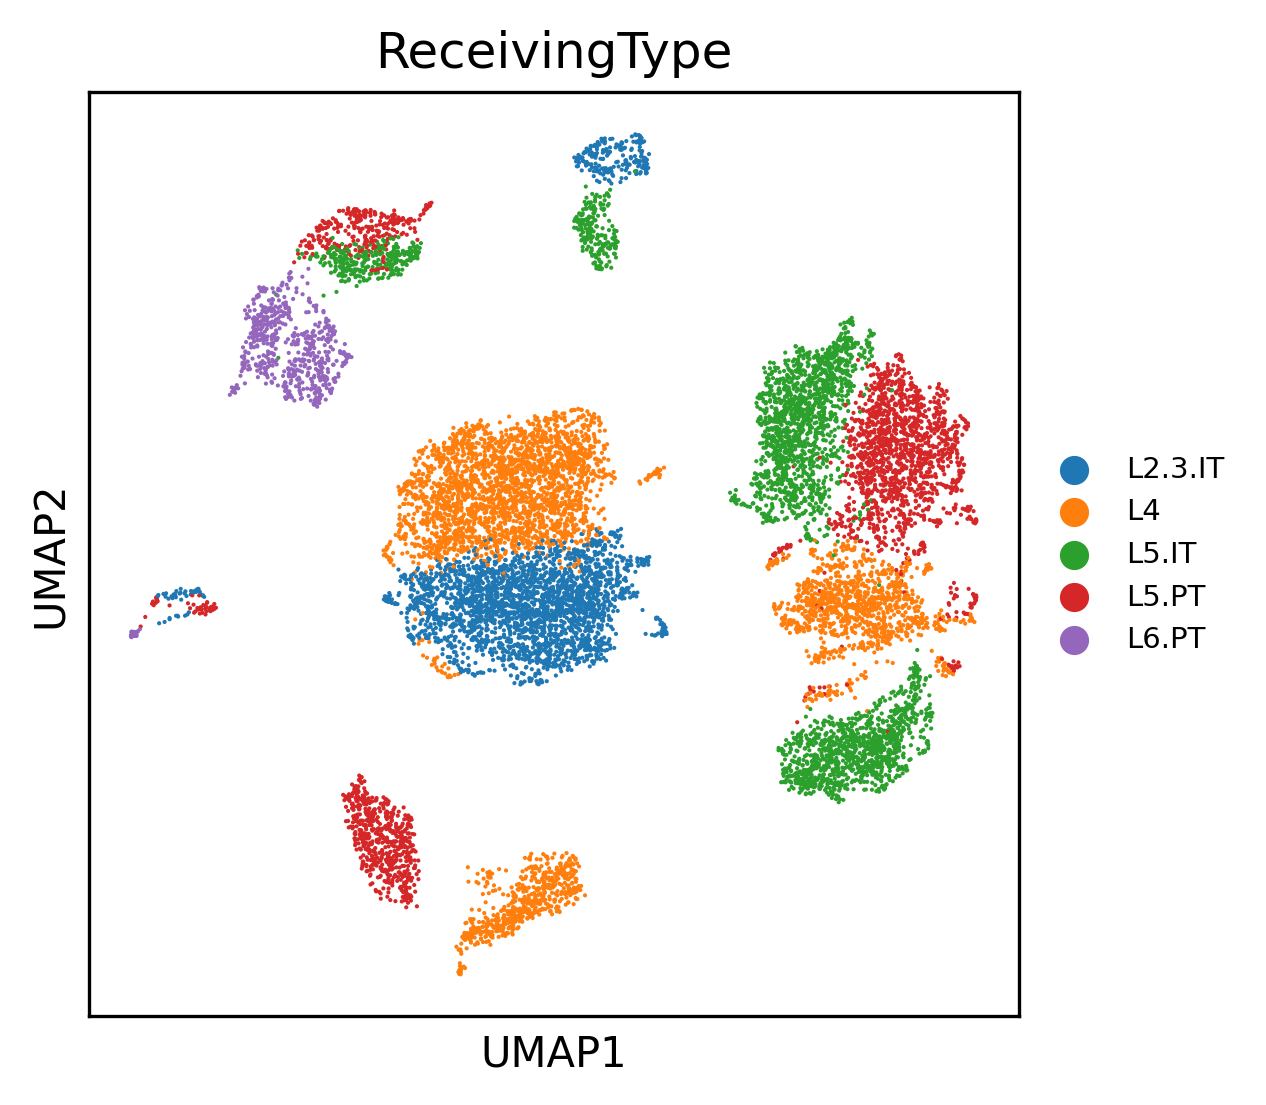

In [13]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=4,legend_loc ="right margin",legend_fontsize=7, title= 'ReceivingType'
              )

# Visualize cellular microenvironment

In [14]:
de_new = CellPairnew
de_new = de_new.drop(['row_index'], axis=1) 
de_new = de_new.drop(['col_index'], axis=1)
merged_df = de_new.groupby(['cell_receiver', 'celltype_receiver','ligand', 'receptor'])['score'].mean().reset_index()  
merged_df['Neighborhood-cell_receiver'] = 'Neighborhood-' + merged_df['cell_receiver']  
merged_df = merged_df.set_index('Neighborhood-cell_receiver')
merged_df

,cell_receiver,celltype_receiver,ligand,receptor,score
Neighborhood-cell_receiver,,,,,
Neighborhood-C1007,C1007,L2.3.IT,Adam10,Itgb1,0.057623
Neighborhood-C1007,C1007,L2.3.IT,Adam15,Erbb4,0.096627
Neighborhood-C1007,C1007,L2.3.IT,App,Itgb1,0.237716
Neighborhood-C1007,C1007,L2.3.IT,Bdnf,Itgb1,0.078390
Neighborhood-C1007,C1007,L2.3.IT,Bsg,Itgb1,0.351714
...,...,...,...,...,...
Neighborhood-C998,C998,L5.IT,Ptn,Sdc2,0.204969
Neighborhood-C998,C998,L5.IT,Shank1,Sstr2,0.095843
Neighborhood-C998,C998,L5.IT,Sst,Sstr2,0.476448


In [15]:
merged_df['column_name'] = merged_df.apply(lambda row: f"{row['ligand']}-{row['receptor']}", axis=1)  
merged_df['row_name'] = merged_df.apply(lambda row: f"Neighborhood-{row['cell_receiver']}", axis=1)  
merged_df = merged_df.set_index(['row_name', 'column_name'])  
result_df = merged_df['score'].unstack(fill_value=0)  
result_df.index.name = None  
result_df.columns.name = None  
result_df

,Adam10-Itgb1,Adam15-Erbb4,App-Itgb1,Bdnf-Itgb1,Bsg-Itgb1,C1qa-Itgb1,C1qb-Kit,Calm1-Itgb1,Calm2-Itgb1,Calm3-Itgb1,...,Nrg1-Erbb4,Nrg1-Itgb1,Nrxn3-Ptprm,Penk-Sdc2,Ptn-Sdc2,Rims1-Slc17a7,Shank1-Sstr2,Sst-Sstr2,Timp2-Itgb1,Vegfa-Itgb1
Neighborhood-C1007,0.057623,0.096627,0.237716,0.078390,0.351714,0.000000,0.000000,0.512129,0.787229,0.196228,...,0.147457,0.089503,0.165624,0.228104,0.346391,0.597999,0.087378,0.449126,0.107807,0.064733
Neighborhood-C1010,0.042997,0.076638,0.182260,0.053303,0.257833,0.069282,0.094868,0.378111,0.580542,0.144361,...,0.115955,0.066018,0.157994,0.223761,0.316798,0.545286,0.062329,0.308046,0.077565,0.042689
Neighborhood-C1011,0.049277,0.147453,0.203988,0.062855,0.294323,0.000000,0.000000,0.429670,0.660361,0.164281,...,0.222347,0.076717,0.196804,0.211513,0.322928,0.669065,0.068019,0.322930,0.088231,0.052094
Neighborhood-C1014,0.049441,0.123269,0.210942,0.057679,0.300698,0.054179,0.091227,0.430648,0.669812,0.167171,...,0.159992,0.067291,0.000000,0.218506,0.267020,0.000000,0.110010,0.566128,0.095955,0.044955
Neighborhood-C1015,0.030218,0.047805,0.125342,0.042717,0.179888,0.000000,0.000000,0.268653,0.413024,0.102236,...,0.077847,0.049235,0.093253,0.144184,0.235082,0.496590,0.047924,0.234889,0.056421,0.034599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Neighborhood-C976,0.052194,0.123304,0.217406,0.055986,0.315876,0.050999,0.056286,0.441178,0.690423,0.171815,...,0.142604,0.062301,0.000000,0.161973,0.195153,0.000000,0.073714,0.378299,0.103978,0.048643
Neighborhood-C977,0.048314,0.101899,0.202832,0.059308,0.285842,0.000000,0.000000,0.419658,0.645588,0.160374,...,0.154449,0.073856,0.169630,0.182090,0.251003,0.490227,0.065883,0.334115,0.086816,0.046131
Neighborhood-C982,0.063609,0.171267,0.260566,0.061087,0.373288,0.059021,0.120872,0.516954,0.802470,0.197162,...,0.202604,0.078525,0.000000,0.247112,0.297228,0.000000,0.080653,0.394260,0.127939,0.061713
Neighborhood-C988,0.054536,0.126843,0.221644,0.053483,0.316722,0.054493,0.120669,0.439998,0.683022,0.167408,...,0.147482,0.065457,0.000000,0.217344,0.269485,0.000000,0.081261,0.391545,0.109254,0.053415


In [16]:
df_dropped = merged_df.drop(['ligand', 'receptor','score'], axis=1) 
df_no_duplicates = df_dropped.drop_duplicates()  
df_no_duplicates.to_csv('./selectmeta_cell.csv', index=True)  

In [17]:
CellMatrix = sc.AnnData(result_df) 
metadata = pd.read_csv("./selectmeta_cell.csv",dtype=str, delimiter=',')
CellMatrix.obs =  pd.DataFrame(metadata).set_index('row_name').rename_axis(None, axis=1)

In [18]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

In [19]:
celltype_colors = {  
    "L2.3.IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5.IT": "#2ca02c",
    "L5.PT": "#d62728",
    "L6.PT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['celltype_receiver'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


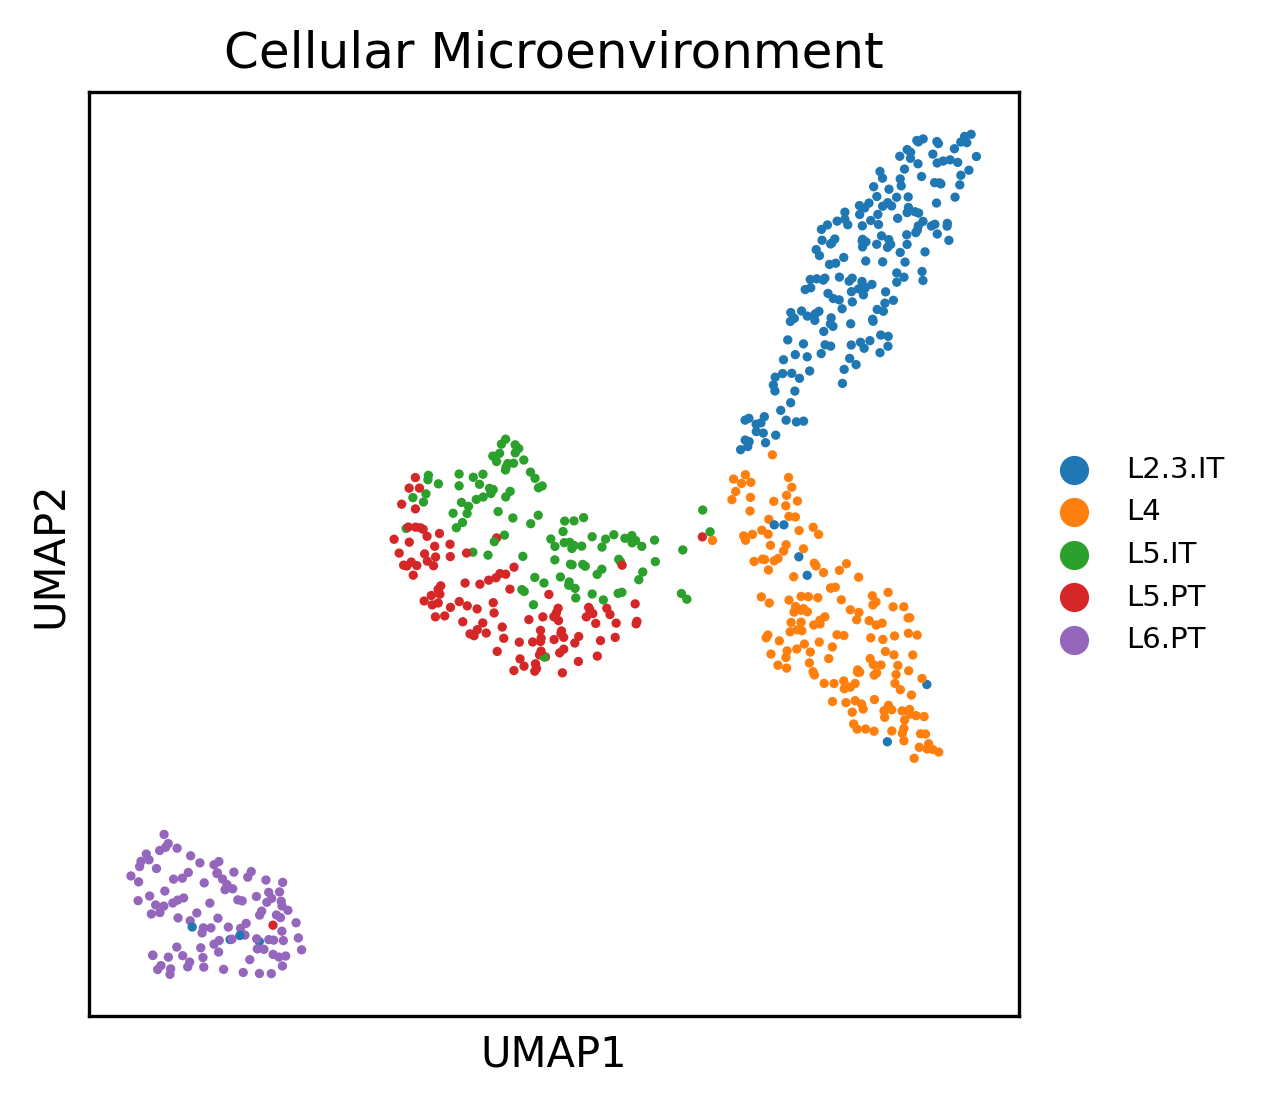

In [20]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=20,legend_loc ="right margin",legend_fontsize=7, title= 'Cellular Microenvironment'
              )

## Using Box Plot to visualize the communication scores between adjacent and distant cell types

In [21]:
CellPairnew = CellPair[(CellPair['celltype_sender'].isin(['L2.3.IT', 'L4', 'L5.PT', 'L5.IT','L6.PT'])) 
    & (CellPair['celltype_receiver'].isin(['L2.3.IT', 'L4', 'L5.PT', 'L5.IT','L6.PT']))]


In [22]:
cell_sender = list(CellPairnew['cell_sender'].values)
cell_receiver = list(CellPairnew['cell_receiver'].values)
ligand = list(CellPairnew['ligand'].values)
receptor = list(CellPairnew['receptor'].values)

In [23]:
score = []
for i in range(len(cell_sender)):
    sco = np.sqrt(float(st_data[cell_sender[i]][ligand[i]]) * float(st_data[cell_receiver[i]][receptor[i]]))
    score.append(sco)
CellPairnew['score'] = score

/tmp/ipykernel_4490/154717285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CellPairnew['score'] = score


In [24]:
df = CellPairnew
df['row_index'] = df['cell_sender'].astype(str) + '-' + df['cell_receiver'].astype(str)  
df['col_index'] = df['ligand'].astype(str) + '-' + df['receptor'].astype(str)  
result_df = df.pivot(index='row_index', columns='col_index', values='score')  
result_df = result_df.fillna(0)  
pivot_df = result_df.rename_axis(index=None, columns=None)  

/tmp/ipykernel_4490/2146405367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_index'] = df['cell_sender'].astype(str) + '-' + df['cell_receiver'].astype(str)
/tmp/ipykernel_4490/2146405367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['col_index'] = df['ligand'].astype(str) + '-' + df['receptor'].astype(str)


In [25]:
row_means = pivot_df.mean(axis=1)
mean_score = pd.DataFrame(pivot_df['Adam10-Itgb1'])
mean_score.rename(columns={'Adam10-Itgb1': 'score'}, inplace=True)
mean_score['score'] = row_means
row_names = mean_score.index.tolist()

In [26]:
st_meta = pd.read_pickle('st_meta.pkl')#The spatial transcriptome meta data
st_meta

,cell,x,y,celltype
1,C1,1161.113371,6178.383054,Vip
2,C2,1162.913371,6113.133054,L5.NP
3,C3,1168.313371,6046.083054,Meis2
4,C4,1163.813371,6202.683054,SMC
5,C5,1166.963371,6083.883054,Meis2
...,...,...,...,...
2395,C2395,3144.263371,5201.433054,L2.3.IT
2396,C2396,3154.613371,5331.033054,SMC
2397,C2397,3165.413371,5190.183054,Sncg
2398,C2398,3189.713371,5292.783054,Vip


In [27]:
distances = []

for element in row_names:
    cell1, cell2 = element.split('-')
    x1, y1 = st_meta.loc[st_meta['cell'] == cell1, ['x', 'y']].values[0]
    x2, y2 = st_meta.loc[st_meta['cell'] == cell2, ['x', 'y']].values[0]
    x1, y1 = float(x1), float(y1)
    x2, y2 = float(x2), float(y2)
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    distances.append(distance)
mean_score['distances'] = distances
mean_score

,score,distances
C1007-C649,0.172713,188.033242
C1007-C676,0.221968,171.381482
C1007-C699,0.230226,172.280077
C1007-C700,0.219442,162.751382
C1007-C768,0.189233,163.978543
...,...,...
C998-C883,0.197618,142.484525
C998-C894,0.021149,175.479807
C998-C947,0.179245,91.787867
C998-C982,0.191996,187.715276


In [28]:
df1 = st_meta
df2 = mean_score

In [29]:
total_scores_per_type = {}  
for celltype in set(df1['celltype']):
    if celltype in {'L2.3.IT', 'L5.IT', 'L5.PT','L6.PT'}:
        l5_np_cells_type = df1[df1['celltype'] == celltype]['cell'].tolist()  
        l2_3_it_cells = df1[df1['celltype'] == 'L4']['cell'].tolist()  
        combinations = [(l5, l2) for l5 in l5_np_cells_type for l2 in l2_3_it_cells]  
        filtered_df2 = df2[df2.index.map(lambda x: tuple(x.split('-')) in combinations)]  
        total_scores_current_type = {cell: 0 for cell in l2_3_it_cells}  
        for index, row in filtered_df2.iterrows():  
            cell_after_dash = index.split('-')[1]  
            if cell_after_dash in total_scores_current_type:  
                total_scores_current_type[cell_after_dash] += row['score']  
        total_scores_per_type[celltype] = total_scores_current_type  
df_new = pd.DataFrame(total_scores_per_type)
print(df_new)  

        L2.3.IT     L5.PT     L5.IT  L6.PT
C382   0.000000  1.622483  1.899862      0
C394   0.222329  1.564172  1.692476      0
C431   0.000000  0.000000  0.000000      0
C461   0.000000  2.381450  2.212391      0
C473   0.827740  1.169311  1.335164      0
...         ...       ...       ...    ...
C2268  1.699227  0.159488  0.709601      0
C2274  0.597000  0.135719  0.423903      0
C2286  6.170765  0.000000  0.172188      0
C2296  7.030817  0.000000  0.347413      0
C2369  6.298010  0.000000  0.172724      0

[169 rows x 4 columns]


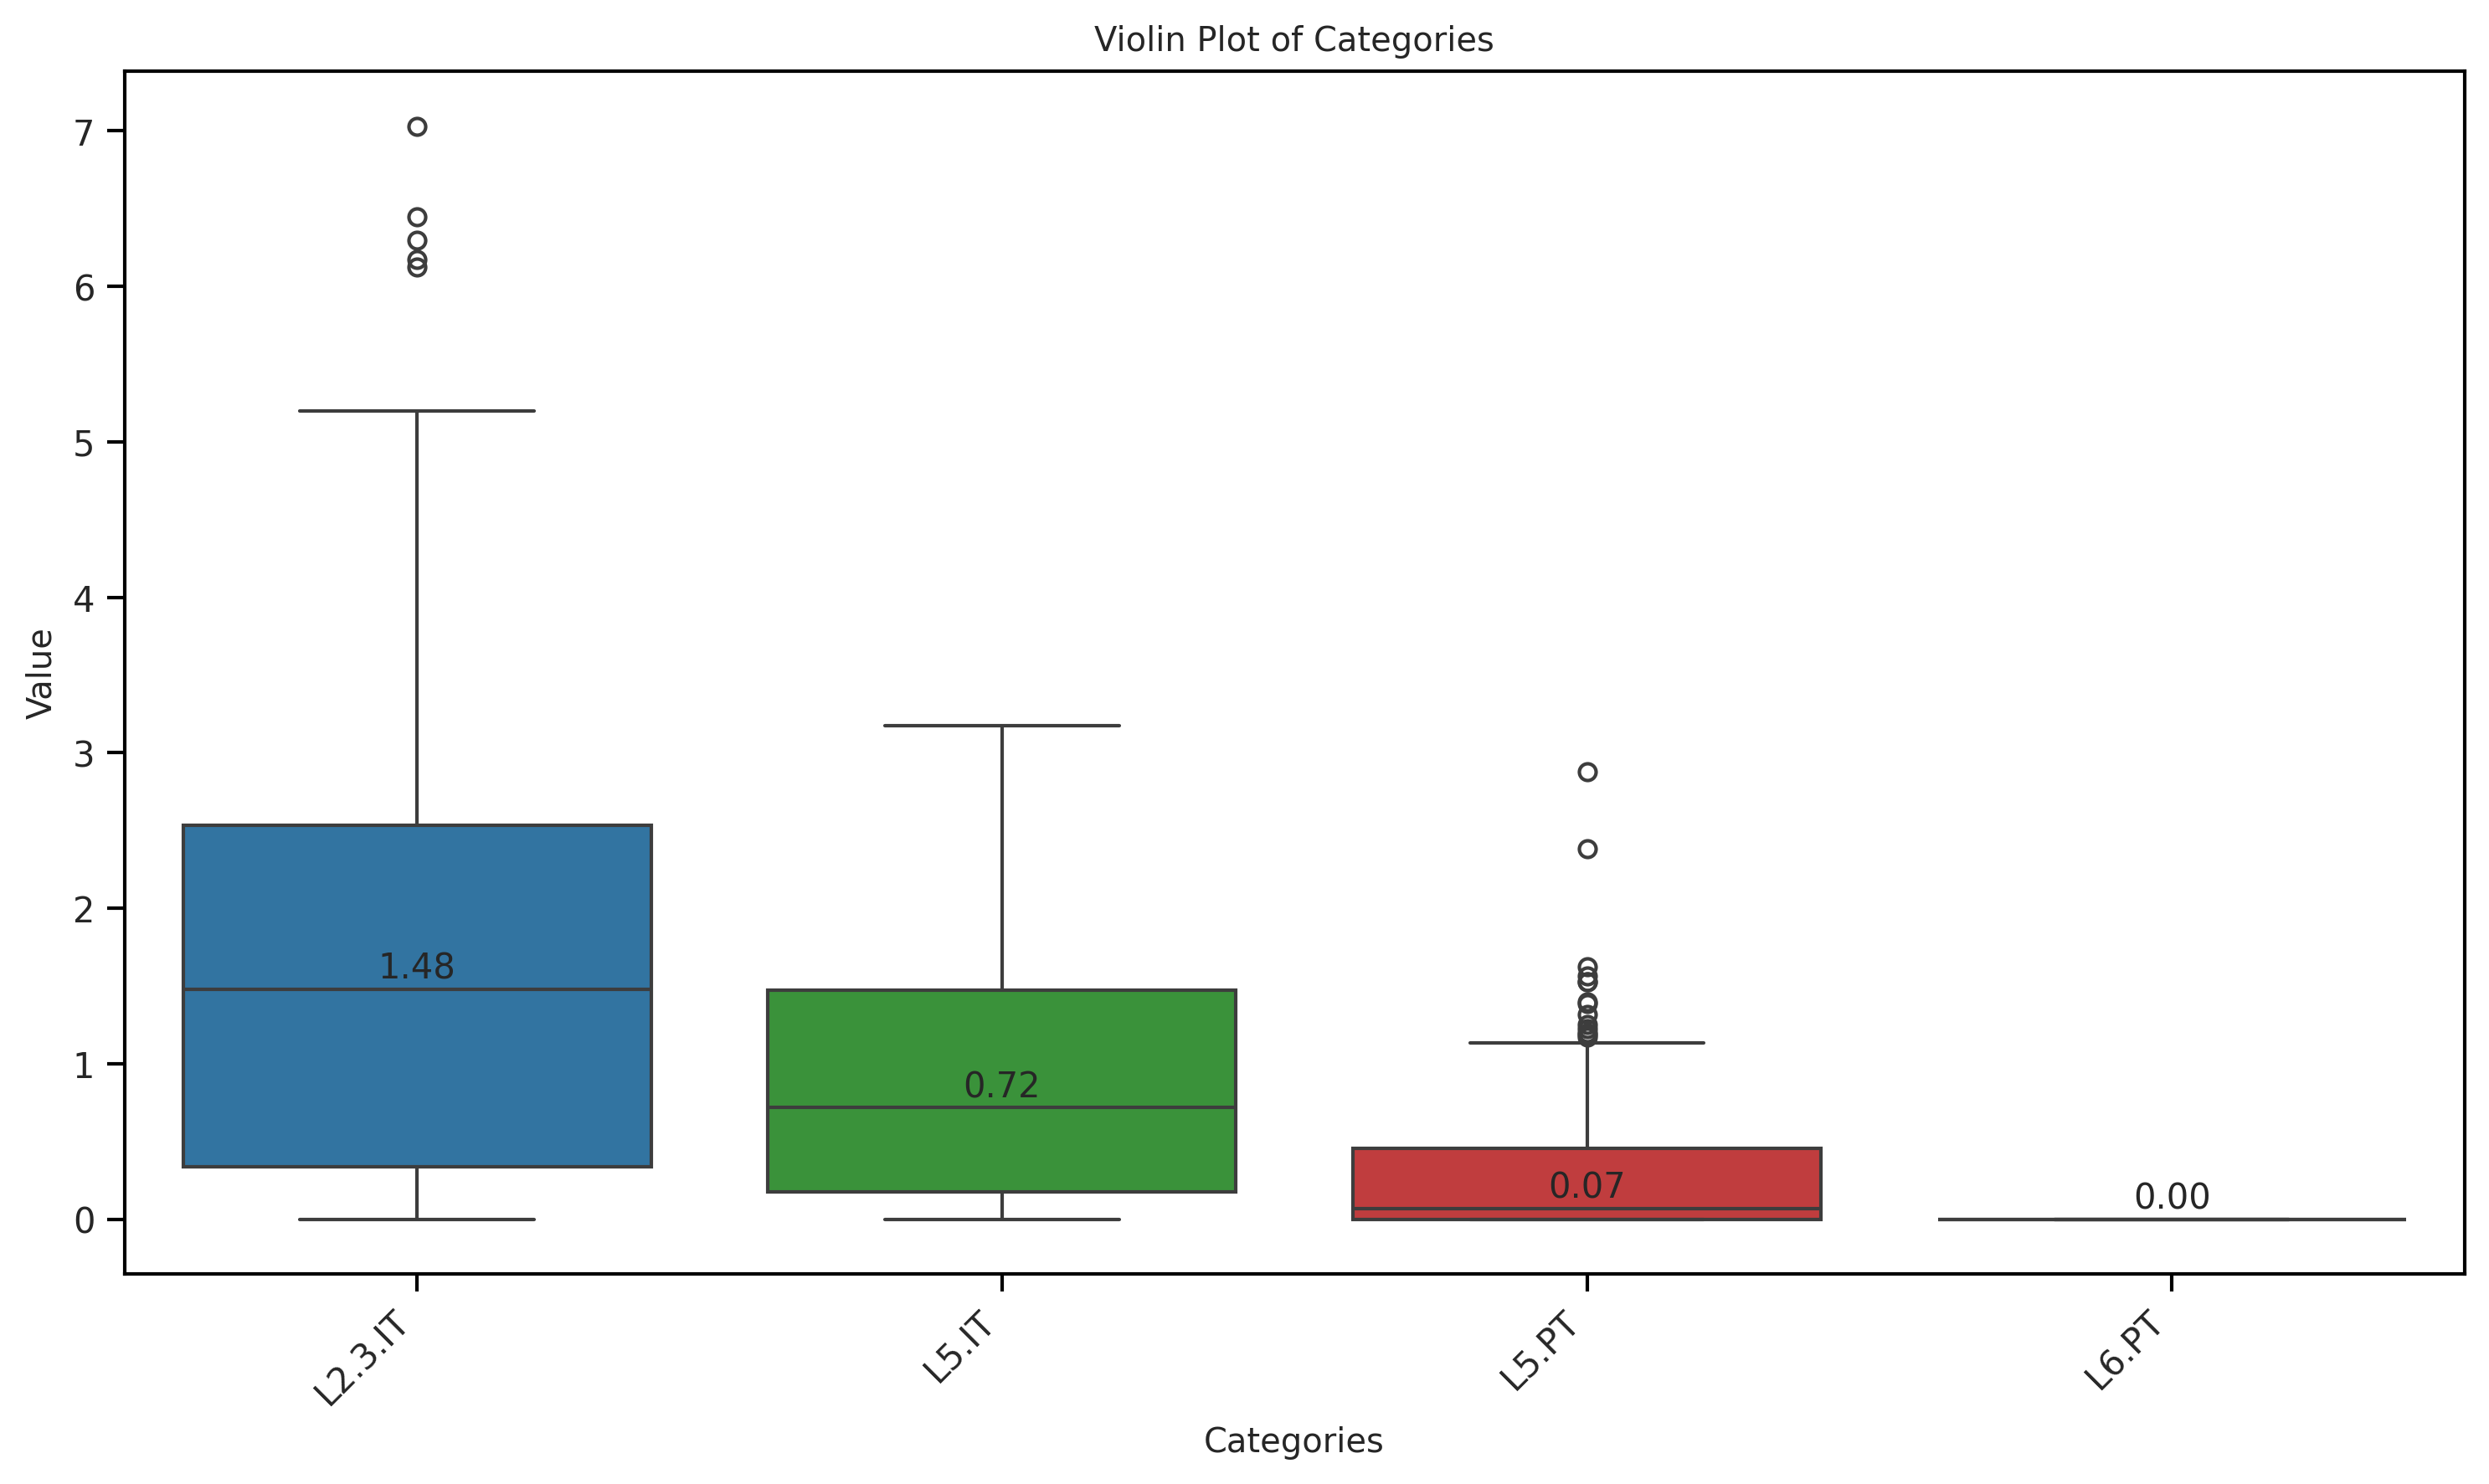

In [30]:
import seaborn as sns      

plt.figure(figsize=(10, 6), dpi=300)    
  
sns.set_style("white")    
  
sns.set_context("paper")    
  
categories = ['L2.3.IT', 'L5.IT', 'L5.PT', 'L6.PT']    
  
sns.boxplot(data=df_new[categories], palette=["#1f77b4","#2ca02c", "#d62728", "#9467bd"],      
                order=categories)      

plt.xlabel('Categories')  
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=45, ha='right')

plt.ylabel('Value')  

plt.title('Violin Plot of Categories')  

plt.gca().legend_ = None    

medians = df_new[categories].median()      
for x, (label, median) in enumerate(medians.items()):      
    plt.text(x, median + 0.02, f'{median:.2f}', ha='center', va='bottom', fontsize=10)
    #plt.axvline(x=x+0.5, ymin=0, ymax=0.5, color='black', linestyle='--', linewidth=1)

plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
  
for spine in plt.gca().spines.values():  
    spine.set_visible(True)

for spine in plt.gca().spines.values():  
    spine.set_color('black')  
    spine.set_linewidth(1)  

plt.gca().xaxis.set_ticks_position('bottom')  
plt.gca().yaxis.set_ticks_position('left')  

plt.tick_params(axis='both', which='major', length=5, width=1, color='black')  
#plt.savefig('./figures/deep_violin_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')  

plt.tight_layout()
plt.show()
